In [1]:
from wavelets.wavelib import WaveletCompression
import matplotlib.pyplot as plt
import numpy as np

DATA = '../data/hadoop15.csv'  # 11773 flows

packets = []
flows = {}
ground_truth = {} 

with open(DATA, 'r') as f:
    for line in f:
        fid, byte, time, _= line.strip().split(',') 
        fid = int(fid)
        byte = int(byte)
        time = int(time) 
        packets.append((fid, byte, time))
        if fid not in flows:
            flows[fid] = []
        flows[fid].append((byte, time))
        wid = time // 10000
        if (fid, wid) not in ground_truth:
            ground_truth[(fid, wid)] = 0
        ground_truth[(fid, wid)] += byte
print(f"Load {len(flows)} flows from {DATA}, totally {len(packets)} packets")

print(f"min time {packets[0][2]}, max time {packets[-1][2]}")

Load 4966 flows from ../data/hadoop15.csv, totally 943419 packets
min time 100000000, max time 124755351


In [2]:
# measuring
from wavelets.usketch import *

sk = uSketch(500) 

for pkt in packets:
    fid, byte, time = pkt
    sk.update(fid, time, byte)

sk.reconstruct()

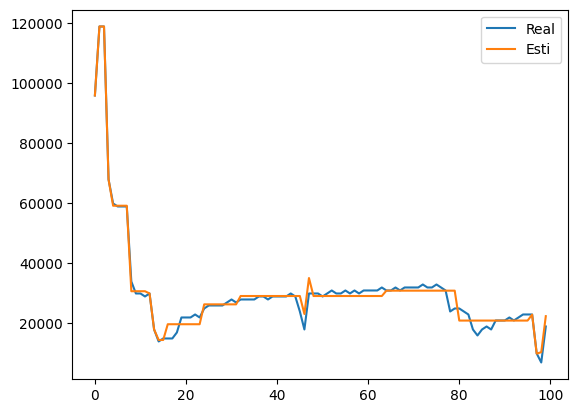

In [3]:
# data loading
import matplotlib.pyplot as plt

fid = 4075
offset = 100
flow_packets = flows[fid]
min_wid = flows[fid][0][1] // 10000
max_wid = min_wid + offset

real_counters = [0] * offset
esti_counters = [0] * offset

for wid in range(min_wid, max_wid):
    if (fid, wid) in ground_truth:
        real_counters[wid - min_wid] = ground_truth[(fid, wid)]
    esti_counters[wid - min_wid] = sk.query(fid, wid)
plt.plot(range(offset), real_counters, label='Real')
plt.plot(range(offset), esti_counters, label='Esti')
plt.legend()
plt.show()

###